In [2]:
# Cell for Slide 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [3]:
# Cell for Slide 4
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Clean the TotalCharges column (it has some blank spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with 0 (for new customers)
df['TotalCharges'].fillna(0, inplace=True)

# Convert Churn to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print(f"\nTotal customers: {len(df)}")
print(f"Churn rate: {df['Churn'].mean():.2%}")

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
Payme

C:\Users\FRANC TECH\AppData\Local\Temp\ipykernel_10796\1683597054.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


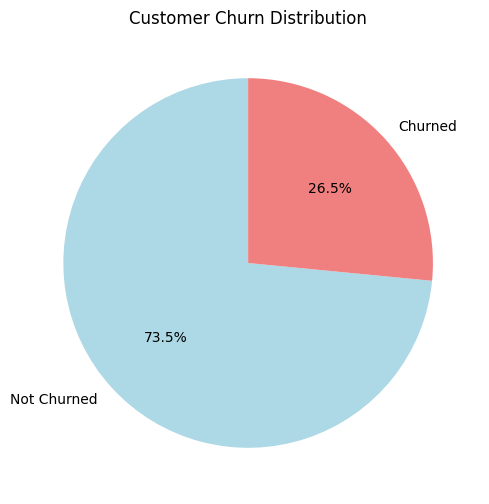

Customers who stayed: 5174 (73.5%)
Customers who left: 1869 (26.5%)


In [4]:
# Cell for Slide 5
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
colors = ['lightblue', 'lightcoral']

plt.pie(churn_counts, labels=['Not Churned', 'Churned'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Customer Churn Distribution')
plt.show()

print(f"Customers who stayed: {churn_counts[0]} ({churn_counts[0]/len(df)*100:.1f}%)")
print(f"Customers who left: {churn_counts[1]} ({churn_counts[1]/len(df)*100:.1f}%)")

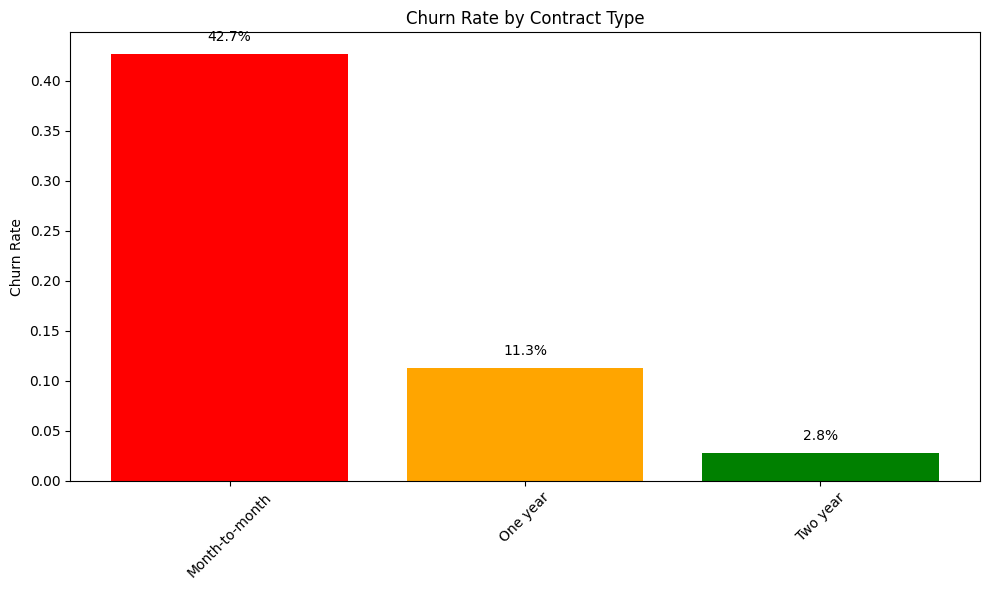

In [5]:
# Cell for Slide 6
plt.figure(figsize=(10, 6))
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

# Create bar plot
bars = plt.bar(churn_by_contract.index, churn_by_contract.values, 
               color=['red', 'orange', 'green'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

# Add percentage labels on bars
for bar, value in zip(bars, churn_by_contract.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

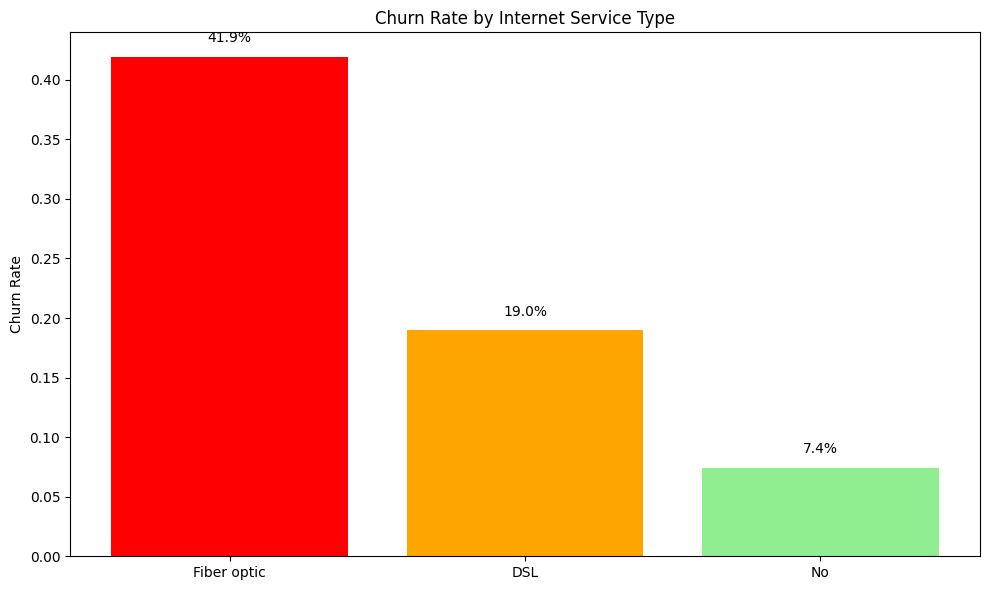

In [6]:
# Cell for Slide 7
plt.figure(figsize=(10, 6))
churn_by_internet = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)

# Create bar plot
bars = plt.bar(churn_by_internet.index, churn_by_internet.values, 
               color=['red', 'orange', 'lightgreen'])
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')

# Add percentage labels on bars
for bar, value in zip(bars, churn_by_internet.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\FRANC TECH\AppData\Local\Temp\ipykernel_10796\2149138786.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('TenureGroup')['Churn'].mean()


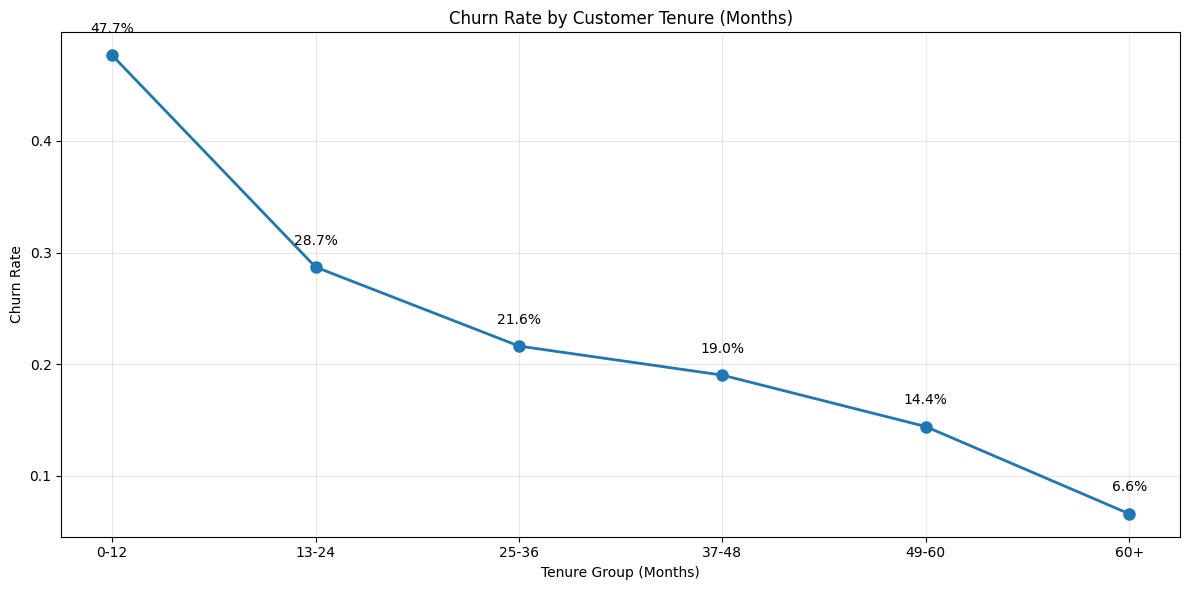

In [7]:
# Cell for Slide 8
plt.figure(figsize=(12, 6))

# Create tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                          labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])

churn_by_tenure = df.groupby('TenureGroup')['Churn'].mean()

plt.plot(churn_by_tenure.index, churn_by_tenure.values, marker='o', linewidth=2, markersize=8)
plt.title('Churn Rate by Customer Tenure (Months)')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate')
plt.grid(True, alpha=0.3)

# Add value labels on points
for i, value in enumerate(churn_by_tenure.values):
    plt.text(i, value + 0.02, f'{value:.1%}', ha='center')

plt.tight_layout()
plt.show()

In [8]:
# Cell for Slide 9
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select important features for our simple model
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService']
X = pd.get_dummies(df[features])  # Convert categorical to numerical
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train simple model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print("\nKey Features used:")
print(X.columns.tolist())

# Show feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head(5))

Model Accuracy: 76.93%

Key Features used:
['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']

Top 5 Most Important Features:
                       feature  importance
2                 TotalCharges    0.328157
1               MonthlyCharges    0.316484
0                       tenure    0.182163
3      Contract_Month-to-month    0.080519
7  InternetService_Fiber optic    0.048053


In [9]:
# Cell for Slide 10
# Summary statistics
print("KEY FINDINGS SUMMARY:")
print("=" * 50)
print(f"Overall Churn Rate: {df['Churn'].mean():.1%}")
print(f"Highest Churn - Contract: {df.groupby('Contract')['Churn'].mean().idxmax()} "
      f"({df.groupby('Contract')['Churn'].mean().max():.1%})")
print(f"Highest Churn - Internet: {df.groupby('InternetService')['Churn'].mean().idxmax()} "
      f"({df.groupby('InternetService')['Churn'].mean().max():.1%})")
print(f"Average Tenure of Churned Customers: {df[df['Churn']==1]['tenure'].mean():.1f} months")
print(f"Average Tenure of Retained Customers: {df[df['Churn']==0]['tenure'].mean():.1f} months")

print("\nRECOMMENDATIONS:")
print("1. Target month-to-month contract customers with loyalty offers")
print("2. Investigate and improve fiber optic service quality")
print("3. Create retention programs for customers in their first year")
print("4. Monitor customers with high monthly charges")

KEY FINDINGS SUMMARY:
Overall Churn Rate: 26.5%
Highest Churn - Contract: Month-to-month (42.7%)
Highest Churn - Internet: Fiber optic (41.9%)
Average Tenure of Churned Customers: 18.0 months
Average Tenure of Retained Customers: 37.6 months

RECOMMENDATIONS:
1. Target month-to-month contract customers with loyalty offers
2. Investigate and improve fiber optic service quality
3. Create retention programs for customers in their first year
4. Monitor customers with high monthly charges
